In [ ]:
import matplotlib, matplotlib.pyplot as plt, numpy as np
from astropy.io import fits
from matplotlib.colors import Normalize

plt.style.use('mplstyle.txt')
%config InlineBackend.figure_format = 'retina'

### read-in spectra

In [2]:
name = '0886.norm.dc.fits'

hdul = fits.open('data/SMC_SNR/'+'b'+name)
bflux = hdul[0].data
if 'CD1_1' in list(hdul[0].header.keys()):
    bwave = hdul[0].header['CRVAL1'] + hdul[0].header['CD1_1'] * (np.arange(hdul[0].header['NAXIS1']) - hdul[0].header['CRPIX1'] + 1)
else:
    bwave = hdul[0].header['CRVAL1'] + hdul[0].header['CDELT1'] * (np.arange(hdul[0].header['NAXIS1']) - hdul[0].header['CRPIX1'] + 1)

hdul = fits.open('data/SMC_SNR/'+'r'+name)
rflux = hdul[0].data
if 'CD1_1' in list(hdul[0].header.keys()):
    rwave = hdul[0].header['CRVAL1'] + hdul[0].header['CD1_1'] * (np.arange(hdul[0].header['NAXIS1']) - hdul[0].header['CRPIX1'] + 1)
else:
    rwave = hdul[0].header['CRVAL1'] + hdul[0].header['CDELT1'] * (np.arange(hdul[0].header['NAXIS1']) - hdul[0].header['CRPIX1'] + 1)

flux = np.concatenate((bflux,rflux))

### read-in and sort hexagon data

In [3]:
hex = np.loadtxt('data/fiber_info/STD Array Elements-Table 1.csv', delimiter=',', skiprows=13, usecols=(3,4), max_rows=552)
sorted_data = []  # sort the data in a snake-like pattern
for i, y in enumerate(np.unique(hex[:, 1])):  # get all vertical values
    row_mask = hex[:, 1] == y
    row_data = hex[row_mask]
    sorted_indices = np.argsort(row_data[:, 0])  # sort by x coord
    if i % 2 == 0:  # even index rows go right-to-left, odd go left-to-right
        sorted_indices = sorted_indices[::-1]
    sorted_data.extend(row_data[sorted_indices])
hex = np.array(sorted_data)

### plotting

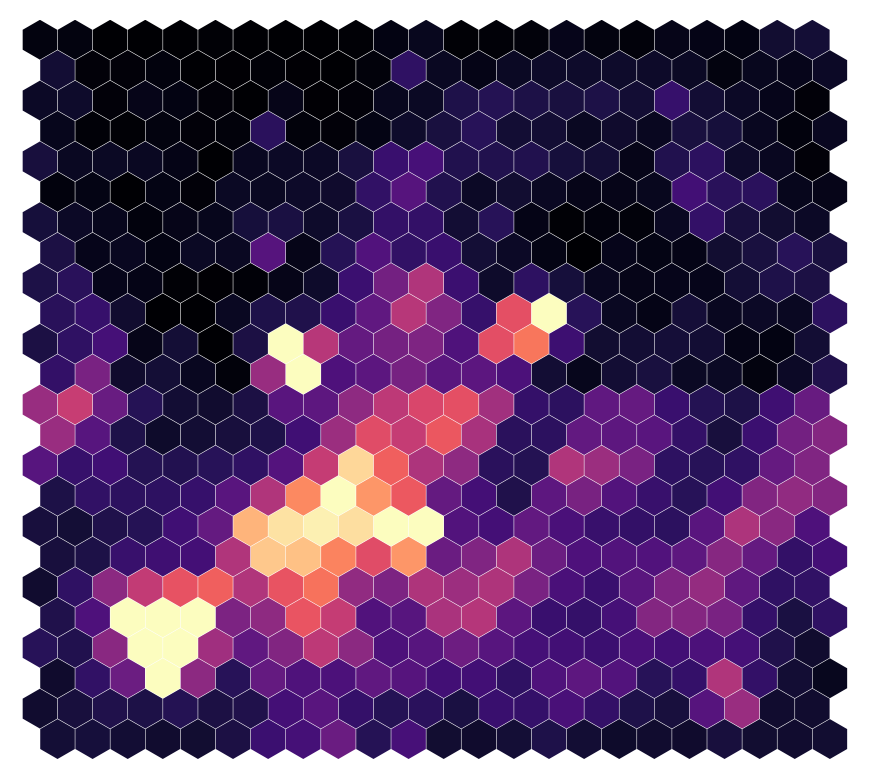

In [4]:
r = 0.335
cmap = matplotlib.colormaps['magma']
counts = []
for i in range(len(flux)): counts.append(np.sum(flux[i]))
norm = Normalize(vmin=np.percentile(counts, 2), vmax=np.percentile(counts, 98))

fig,ax=plt.subplots(1,1, dpi=100)
for x,y,i in zip(hex[:,0], hex[:,1], range(len(hex[:,0]))):
    color = cmap(norm(counts[i]))
    hexag = matplotlib.patches.RegularPolygon((x,y), numVertices=6, radius=r, facecolor=color)
    ax.add_patch(hexag)
    # ax.text(x, y, f'{i+1}', ha='center', va='center', fontsize=6, color='red')  # takes a long time, reduce hexagons to see numbers

ax.set_xlim(np.min(hex[:,0])-r, np.max(hex[:,0])+r)
ax.set_ylim(np.min(hex[:,1])-r, np.max(hex[:,1])+r)
ax.set_aspect('equal'); ax.invert_xaxis()
ax.set_axis_off()